# Studying the affect of different consituents on quality of Wine


Loading all the Libraries for EDA

In [3]:


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv(r"C:\Users\daman\Downloads\archive (11)\winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Dataset seems in a perfect shape, so we can proceed with analysis without any data cleaning


Let start by analysing variation in alcohol content in different sample of wines

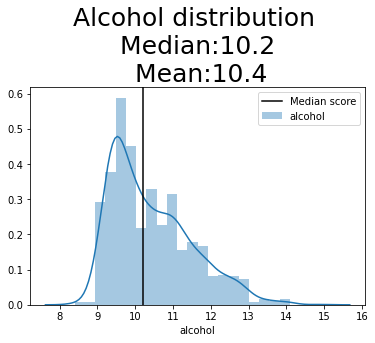

In [6]:
sns.distplot(df['alcohol'],label='alcohol')
plt.title('Alcohol distribution \n Median:{0:.1f} \n Mean:{1:.1f}'.format(df['alcohol'].median(),
                                                                            df['alcohol'].mean()),size=25)
l1=plt.axvline(df['alcohol'].median(),color='black',label='Median score')
plt.legend()

As we can see the resulting distribution is right skewed suggesting preference of less alcohol content. Let see if that is going to have an impact on quality.

Now lets see the correlation between different variables in the given dataset to see if we can see some pattern

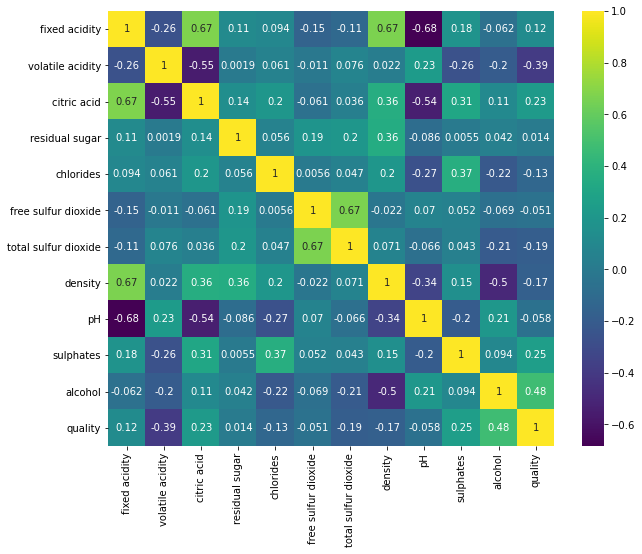

In [8]:
correlations=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlations,annot=True,cmap='viridis')

As we can see there is no significant correlation between the variables suggesting low interdependence among variables. 
As far as quality is concerned it is correlated to great extent with alcohol. 
So, at this point it is fair to establish a notion that alcohol content could be great factor in deciding the overall quality of Wine. 

Let us now develop a machine learning model to study effect of different variables on quality in more depth and predict the quality of wine for different proportion of constituents. 


Lets start by splitting the data into test and training sets. We will use the test set for cross validation later in our analysis to determine the accuracy of the model.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = df.iloc[:,:-1]

In [11]:
y = df['quality']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 80)

We will employ random forest regressor here to predict the quality of wine on a scale of 1 to 10 

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
random_forest = RandomForestRegressor(max_features = 3, random_state = 1)

random_forest.fit(x_train, y_train)

pred = random_forest.predict(x_test)
mean_squared_error(y_test, pred)

0.34906625

In [14]:
RMSE_Random_Forest =np.sqrt(mean_squared_error(y_test, pred))
RMSE_Random_Forest

0.590818288477938

As we can see our regression model has RMSE of 0.59, Which is not great but is acceptable. 

I reckon we have been a bit too hard with the model by making it precisely predict the quality on a scale of 1 to 10. Lets add a bit of simplicity to our analysis by assigning class to the quality ratings. 
Lets, assign 'Recommended' class to all the samples with quality rating more than 5 and 'Not Recommended' class to samples with ratings less than or equal to 5.

In [15]:
i = y<= 5
j = y >5


In [16]:
y [i] = 'Recommended'
y[j] = 'Not Recommended'


<ipython-input-16-3f084164eb39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y [i] = 'Recommended'


In [17]:
df['quality']

0           Recommended
1           Recommended
2           Recommended
3       Not Recommended
4           Recommended
             ...       
1594        Recommended
1595    Not Recommended
1596    Not Recommended
1597        Recommended
1598    Not Recommended
Name: quality, Length: 1599, dtype: object

Now lets use random forest classifier to predict the quality class for given sample of wine.

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 80)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(max_features = 4, random_state = 1)
clf.fit(x_train,y_train)

RandomForestClassifier(max_features=4, random_state=1)

In [21]:
pred = clf.predict(x_test)

In [22]:
accuracy_score(y_test,pred)

0.815625

Results look more pleasing. As expected. Random forest has fared well on modified dataset and produced amazing accuracy of 81.5 %

Let make confusion matrix to see result of our predictions

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
labels = ['Recommended', 'Not Recommended']
cm = confusion_matrix(y_test, pred,labels)

C:\Users\daman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=['Recommended', 'Not Recommended'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [25]:
print(cm)

[[116  33]
 [ 26 145]]


[[116  33]
 [ 26 145]]


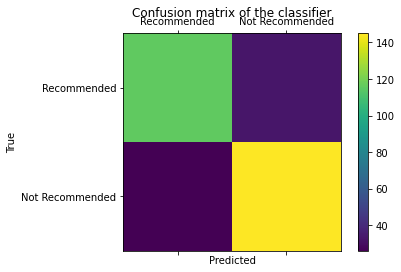

In [26]:
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Now lets see the importance of different variables in our predictive analysis.

In [28]:
features=df.columns[:-1]

Text(0.5, 0, 'Relative Importance')

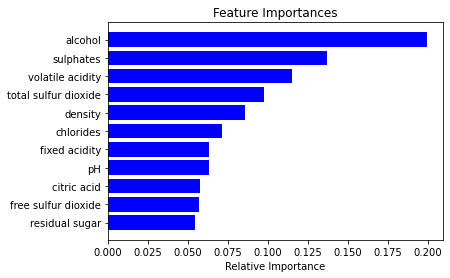

In [29]:
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

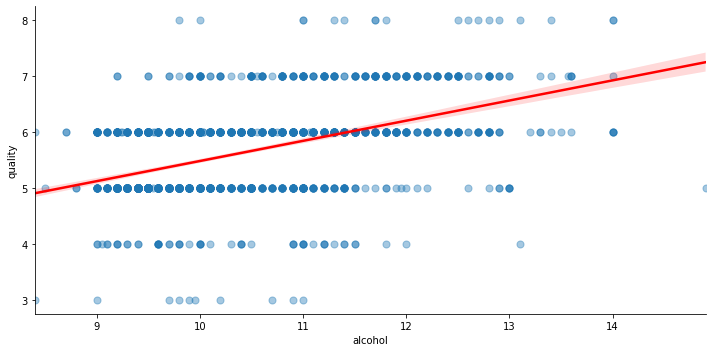

In [32]:
g=sns.lmplot('alcohol','quality',data=df,order=1,line_kws={'color':'red','linewidth':2.5},
           height=5,aspect=2,scatter_kws={'s':50,'alpha':0.4})


So, higher alcohol content actually results in better quality, which is contradictory to what we saw during EDA. So, should the wine manufacutrers increase the alcohol content in their wines? 
I would say Yes.
I think under the the influence of alcohol wine starts tasting better!
# Personal Experience
Always knew, alcohol free wine would be shit!
So never tried it, seems like I made right decision.